In [19]:
import pandas as pd 
import numpy as np
from numpy import absolute
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor 
import warnings
print('done')

done


In [20]:
file_name = 'D:/ĐỒ ÁN/DoAn2/dữ liệu/data1/used_cars_data_update.csv'
df = pd.read_csv(file_name, index_col=0)
df.head(5)

,Mileage,Engine,Power,Seats,Ageofcar,Kilometers_Driven_log,Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
S.No.,,,,,,,,,,,,,,,,,,,,,
0,26.60,998,58.16,5.0,11,11.184421,0.559616,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,19.67,1582,126.20,5.0,6,10.621327,2.525729,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,18.20,1199,88.70,5.0,10,10.736397,1.504077,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,20.77,1248,88.76,7.0,9,11.373663,1.791759,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,15.20,1968,140.80,5.0,8,10.613246,2.875822,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [21]:
X = df.drop(['Price_log'],axis=1)
y = df['Price_log']

In [22]:
X.head()

,Mileage,Engine,Power,Seats,Ageofcar,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
S.No.,,,,,,,,,,,,,,,,,,,,,
0,26.60,998,58.16,5.0,11,11.184421,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,19.67,1582,126.20,5.0,6,10.621327,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,18.20,1199,88.70,5.0,10,10.736397,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
3,20.77,1248,88.76,7.0,9,11.373663,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,15.20,1968,140.80,5.0,8,10.613246,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [23]:
y.head()

S.No.
0    0.559616
1    2.525729
2    1.504077
3    1.791759
4    2.875822
Name: Price_log, dtype: float64

In [24]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [25]:
xg_reg = XGBRegressor()

In [26]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [27]:
score = xg_reg.score(X_train,y_train)
print("Trainnig score: ", score)
cv_score = cross_val_score(xg_reg,X_train,y_train,cv=10)
print("CV mean score: ", cv_score.mean())

Trainnig score:  0.9915954507653278
CV mean score:  0.9459843221910976


In [28]:
y_pred = xg_reg.predict(X_test)

In [29]:
y_pred

array([1.9381105, 1.2735144, 1.3580345, ..., 1.6399732, 3.3568034,
       1.5535382], dtype=float32)

In [30]:

mse = mean_squared_error(y_test,y_pred)
print("MSE: ",mse)

MSE:  0.04531090115699071


In [31]:
import math
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
XG_MAPE = MAPE(y_pred,y_test)
print("R-squared: ", r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))
print("MAPE: ", XG_MAPE)

R-squared:  0.9397843208284853
MAE:  0.13795825454057586
RMSE:  0.21286357404917994
MAPE:  12.759555052908253


In [34]:
Chenh_lech = pd.DataFrame(y_test[0:10])
Chenh_lech['Dự đoán'] = y_pred[0:10]
Chenh_lech['Chênh lệch'] = Chenh_lech['Dự đoán'] - Chenh_lech['Price_log']
print(Chenh_lech, "\n")

       Price_log   Dự đoán  Chênh lệch
S.No.                                 
5150    1.981001  1.938110   -0.042891
2164    1.446919  1.273514   -0.173405
1136    1.360977  1.358034   -0.002942
5641    2.129421  2.180113    0.050692
1515    2.601207  2.612015    0.010808
1675    1.446919  1.459019    0.012100
2268    1.677097  1.611286   -0.065810
143     0.512824  0.712447    0.199623
4646    1.321756  1.480498    0.158742
5008    1.178655  1.339167    0.160512 



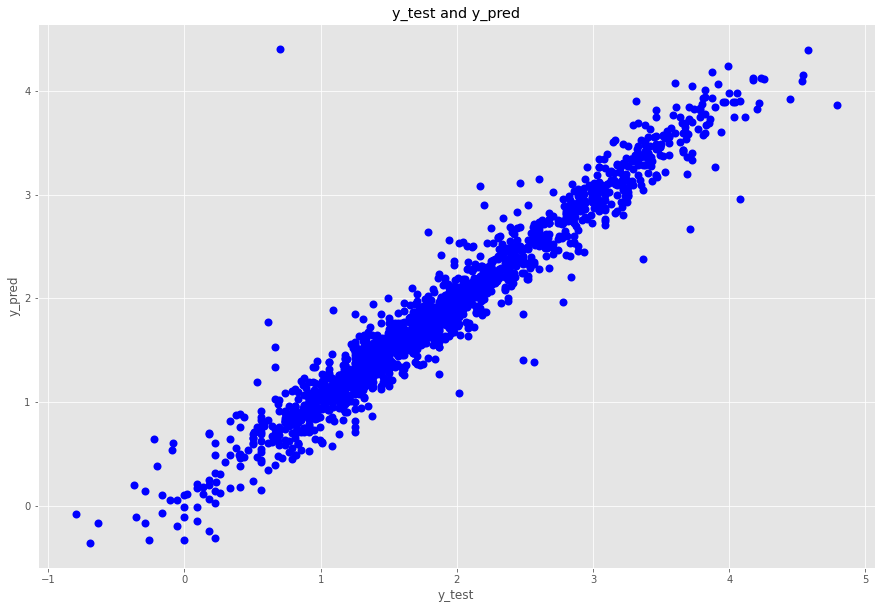

In [35]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred,color='blue', linewidths = 2,marker ="o")
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test and y_pred')
plt.savefig('D:\XG.png')